# Explore here

In [31]:
# Sistema de clasificación de imágenes
# Clasificar las imágenes en perros o gatos
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image


['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg', 'dog.10005.jpg', 'dog.10006.jpg', 'dog.10007.jpg', 'dog.10008.jpg', 'dog.10009.jpg', 'dog.1001.jpg', 'dog.10010.jpg', 'dog.10011.jpg', 'dog.10012.jpg', 'dog.10013.jpg', 'dog.10014.jpg', 'dog.10015.jpg', 'dog.10016.jpg', 'dog.10017.jpg', 'dog.10018.jpg', 'dog.10019.jpg', 'dog.1002.jpg', 'dog.10020.jpg', 'dog.10021.jpg', 'dog.10022.jpg', 'dog.10023.jpg', 'dog.10024.jpg', 'dog.10025.jpg', 'dog.10026.jpg', 'dog.10027.jpg', 'dog.10028.jpg', 'dog.10029.jpg', 'dog.1003.jpg', 'dog.10030.jpg', 'dog.10031.jpg', 'dog.10032.jpg', 'dog.10033.jpg', 'dog.10034.jpg', 'dog.10035.jpg', 'dog.10036.jpg', 'dog.10037.jpg', 'dog.10038.jpg', 'dog.10039.jpg', 'dog.1004.jpg', 'dog.10040.jpg', 'dog.10041.jpg', 'dog.10042.jpg', 'dog.10043.jpg', 'dog.10044.jpg', 'dog.10045.jpg', 'dog.10046.jpg', 'dog.10047.jpg', 'dog.10048.jpg', 'dog.10049.jpg', 'dog.1005.jpg'

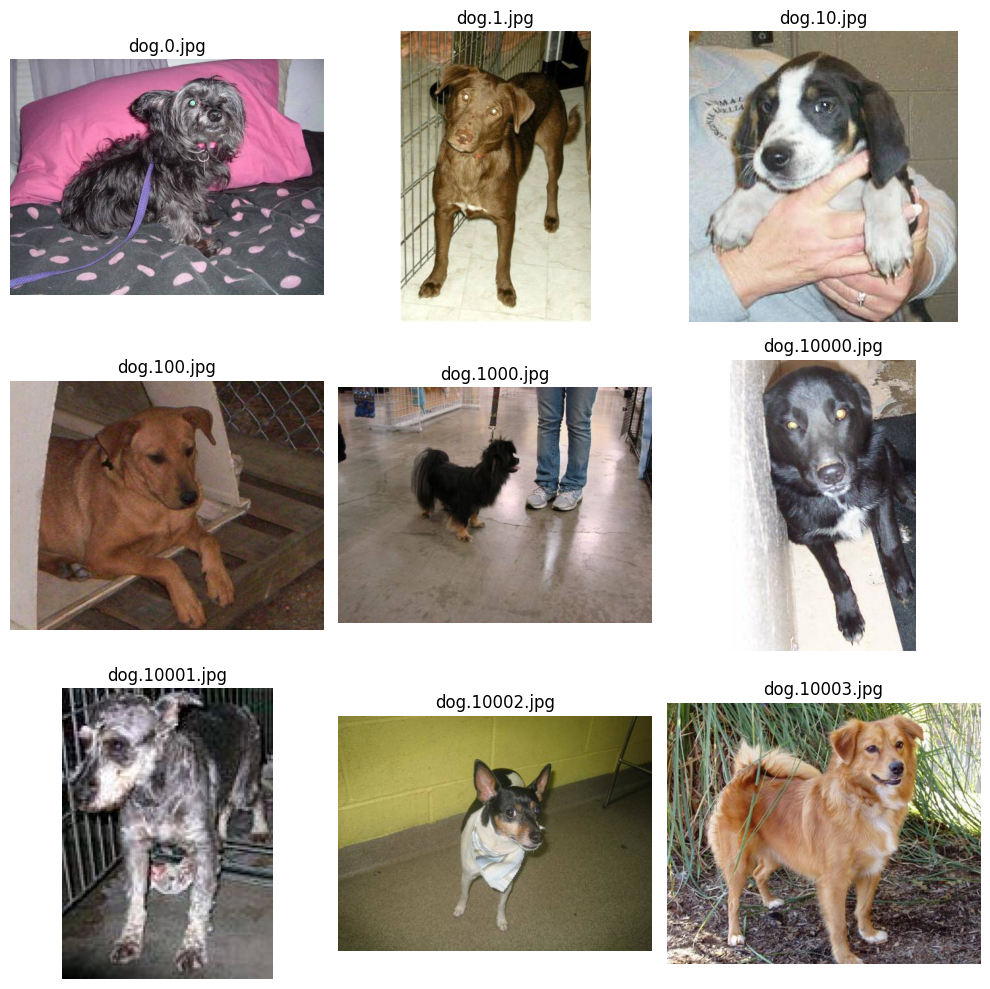

In [45]:
# Importar y comprobar las 9 primeras imágenes de perros

from PIL import Image

# Ruta al directorio que contiene sus datos de imagen
data_dir = r"C:\Users\loren\Documents\GitHub\Deep_learning\Deep-learning\data\raw\train" 

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_images = [f for f in os.listdir(data_dir) if f.startswith('dog')]

print(dog_images)

# Tomar las primeras 9 imágenes
dog_images = dog_images[:9]

# Mostrar las imágenes
plt.figure(figsize=(10, 10))

for i, image_name in enumerate(dog_images):
    image_path = os.path.join(data_dir, image_name)
    image = Image.open(image_path)
    
    plt.subplot(3, 3, i + 1)  # Crear una cuadrícula de 3x3
    plt.imshow(image)
    plt.title(image_name)
    plt.axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

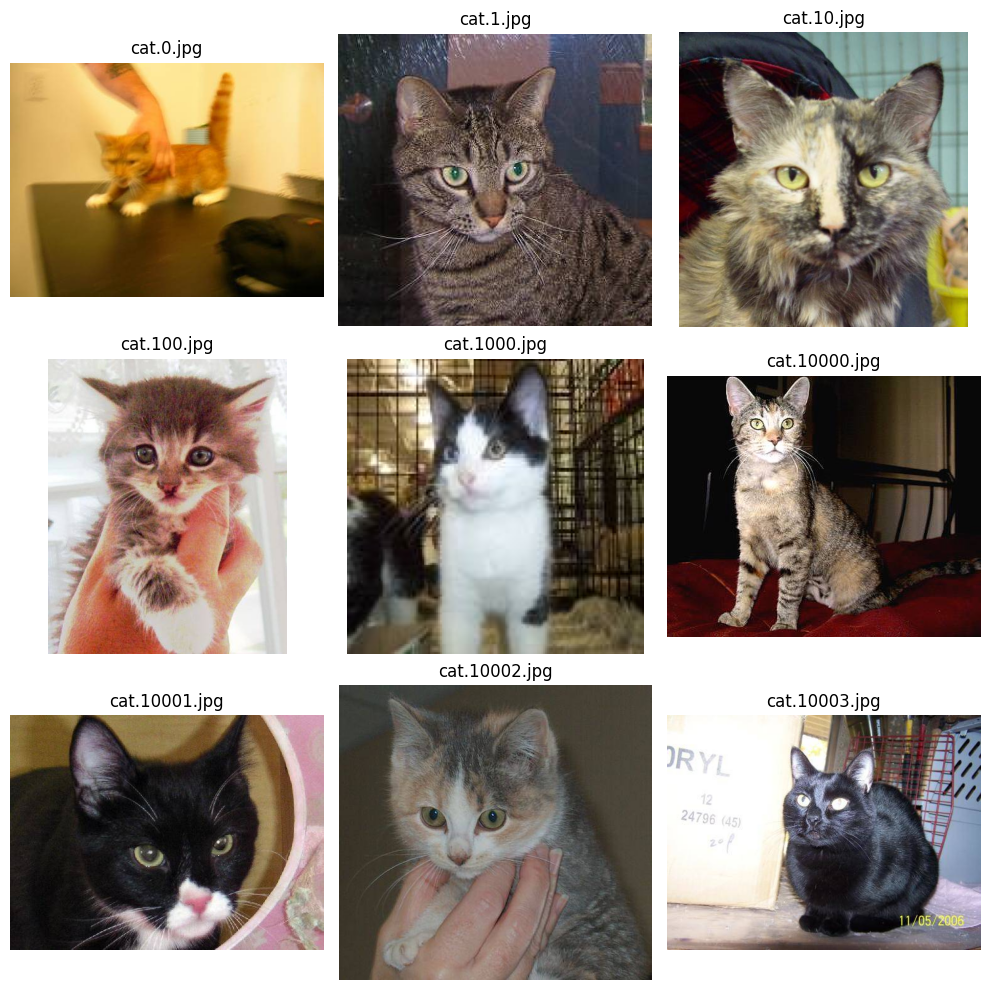

In [26]:
# Importar y comprobar las 9 primeras imágenes de gatos

# Obtener una lista de todos los nombres de archivos de imágenes de gatos
cat_images = [f for f in os.listdir(data_dir) if f.startswith('cat')]

print(cat_images)

# Tomar las primeras 9 imágenes
cat_images = cat_images[:9]

# Mostrar las imágenes
plt.figure(figsize=(10, 10))

for i, image_name in enumerate(cat_images):
    image_path = os.path.join(data_dir, image_name)
    image = Image.open(image_path)
    
    plt.subplot(3, 3, i + 1)  # Crear una cuadrícula de 3x3
    plt.imshow(image)
    plt.title(image_name)
    plt.axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()


Crear los conuntos de imágenes

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = "../data/raw/train" 
test_dir = "../data/raw/test1" 
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],
    class_mode='binary'
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["test"]
)

Found 0 images belonging to 2 classes.


Found 0 images belonging to 1 classes.


In [46]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)